# Comparison PyMedPhys' custom implemenation of multilinear interpolation to other implementations

### Imports

In [1]:
from pymedphys._imports import numpy as np
from pymedphys._interp import interp

### Set up known data

In [2]:
INTERP_MULTIPLE = 20

x_num = 11
y_num = 6
z_num = 31

x = np.linspace(0, 10, x_num)
y = np.linspace(10, 20, y_num)
z = np.linspace(-20, 10, z_num)

X, Y, Z = np.meshgrid(x, y, z, indexing="ij")
values = X**2 + Y**2 + Z**2

### Set up points for which to interpolate values

In [3]:
xi = np.linspace(x[0], x[-1], x_num * INTERP_MULTIPLE - 1)
yi = np.linspace(y[0], y[-1], y_num * INTERP_MULTIPLE - 1)
zi = np.linspace(z[0], z[-1], z_num * INTERP_MULTIPLE - 1)

### Interpolate using PyMedPhys interpolator

In [4]:
values_interp = interp.multilinear_interp(
    (x, y, z), values, axes_interp=(xi, yi, zi), algo="pymedphys"
).reshape((xi.size, yi.size, zi.size))

### Plot a slice

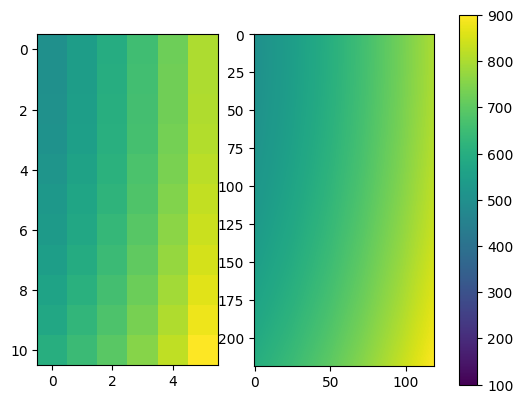

In [5]:
interp.plot_interp_comparison_heatmap(
    values=values,
    values_interp=values_interp,
    slice_axis=2,
    slice_number=0,
    slice_number_interp=0,
)

### Time comparisons

PyMedPhys

In [6]:
%%timeit

interp.multilinear_interp(
    (x, y, z), values, axes_interp=(xi, yi, zi), algo="pymedphys"
).reshape((xi.size, yi.size, zi.size))

456 ms ± 10.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


EconForge

In [7]:
%%timeit

interp.multilinear_interp(
    (x, y, z), values, axes_interp=(xi, yi, zi), algo="econforge"
).reshape((xi.size, yi.size, zi.size))

702 ms ± 8.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Scipy

In [8]:
%%timeit

interp.multilinear_interp(
    (x, y, z), values, axes_interp=(xi, yi, zi), algo="scipy"
).reshape((xi.size, yi.size, zi.size))

3.38 s ± 110 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
